In [195]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from helper import *
import seaborn as sns

In [274]:
from sklearn import  model_selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [162]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [7]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Sample from the original data
- data1: 4000 record
- data2: 4000 record
- save 2000 record for validation purposes

In [8]:
X_1, X_2, y_1, y_2 = train_test_split(df.loc[:, df.columns != 'default.payment.next.month'], df['default.payment.next.month'], test_size= 4000, train_size = 6000,random_state=42)

In [9]:
X_1, X_v, y_1, y_v = train_test_split(X_1,y_1, test_size=2000, random_state=42)

In [10]:
print(y_1.value_counts(normalize=True))
print(y_2.value_counts(normalize=True))
print(y_v.value_counts(normalize=True))

0    0.775
1    0.225
Name: default.payment.next.month, dtype: float64
0    0.779
1    0.221
Name: default.payment.next.month, dtype: float64
0    0.79
1    0.21
Name: default.payment.next.month, dtype: float64


For dataset1, will keep 11 attributes as following:
1. limit_bal
2. sex
3. education
4. marriage
5. age
6-11 PAY_0 - Pay_6

For dataset2, will keep 12 attributes as following:
1-6: BILL_AMT1 - BILL_AMT6
7-12: PAY_AMT1 - PAY_AMT6

In [11]:
d1_keep_list = df.columns[1:12]
X_1 = X_1[d1_keep_list]
X_1.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [12]:
d2_keep_list = df.columns[12:-1]
X_2 = X_2[d2_keep_list]
X_2.columns.tolist()

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

Split X_1, y_1, X_2, y_2 to training and testing set

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=0.8, random_state=42)

In [14]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.value_counts(normalize=True))
print(y1_test.value_counts(normalize=True))

(3200, 11)
(800, 11)
0    0.772188
1    0.227813
Name: default.payment.next.month, dtype: float64
0    0.78625
1    0.21375
Name: default.payment.next.month, dtype: float64


In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, train_size=0.8,random_state=42)

In [16]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.value_counts(normalize=True))
print(y2_test.value_counts(normalize=True))

(3200, 12)
(800, 12)
0    0.7825
1    0.2175
Name: default.payment.next.month, dtype: float64
0    0.765
1    0.235
Name: default.payment.next.month, dtype: float64


#### Algorithm 1: Decision Tree

In [17]:
clf = DecisionTreeClassifier(max_depth=50, random_state=1, min_samples_leaf=1, criterion='gini')

In [189]:
#Decision Tree
init_clf = DecisionTreeClassifier(random_state = 1)
init_clf.fit(X1_train, y1_train)
init_clf.get_depth()

36

In [190]:
init_clf2 = DecisionTreeClassifier(random_state = 1)
init_clf2.fit(X2_train, y2_train)
init_clf2.get_depth()

25

In [21]:
def hyperTree(X_train, y_train, X_test, y_test, title, save_name, max_d):

    f1_cv = []
    f1_train = []
    f1_test = []

    max_depth = list(range(1,max_d))
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    for i in max_depth:
            clf = DecisionTreeClassifier(max_depth=i, random_state=1, min_samples_leaf=1, criterion='gini')
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            cv_results = cross_val_score(estimator=clf,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring='f1')

            f1_cv.append(cv_results.mean())
            f1_train.append(f1_score(y_train, y_pred_train))
            f1_test.append(f1_score(y_test, y_pred_test))

    plt.plot(max_depth, f1_cv, 'o-', color='r', label='CV F1 Score')
    plt.plot(max_depth, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.plot(max_depth, f1_test, 'o-', color = 'g', label = 'Test F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Tree Depth')

    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()


 #Per hyperparameter tuning, best

def TreeGridSearchCV(start_leaf_n, end_leaf_n,
                     start_depth, end_depth,
                     X_train, y_train):
    #parameters to search:
    #20 values of min_samples leaf from 0.5% sample to 5% of the training data
    #20 values of max_depth from 1, 10
    param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'),
                  'max_depth':np.arange(start_depth,end_depth),
                  'class_weight':["balanced",{0: 1, 1: 1}] }

    tree = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid=param_grid, cv=10,
                        refit=True, scoring='f1')
    tree.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(tree.best_params_)
    print(tree.best_score_)
    return tree.best_params_

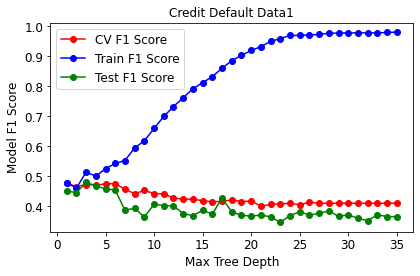

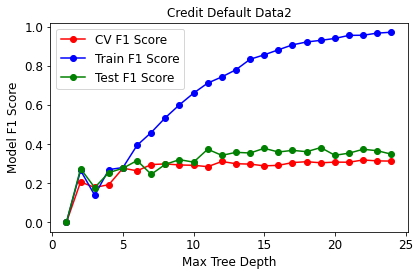

In [102]:
#data1
hyperTree(X1_train, y1_train, X1_test, y1_test, "Credit Default Data1",'d1_tree_depth.png', init_clf.get_depth() )
#data2
hyperTree(X2_train, y2_train, X2_test, y2_test, "Credit Default Data2",'d2_tree_depth.png', init_clf2.get_depth() )

In [23]:
#data1
#Grid Search
#Pre-pruning
start_leaf_n = round(0.005*len(X1_train))
end_leaf_n = round(.05*len(X1_train))

In [24]:
best_params = TreeGridSearchCV(start_leaf_n,
                               end_leaf_n,
                               1,10,
                               X1_train,
                               y1_train)

Per Hyperparameter tuning, best parameters are:
{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 24}
0.5430811360191674


In [25]:
best_params

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 24}

In [26]:
best_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_leaf'],
                                   class_weight=best_params['class_weight'])

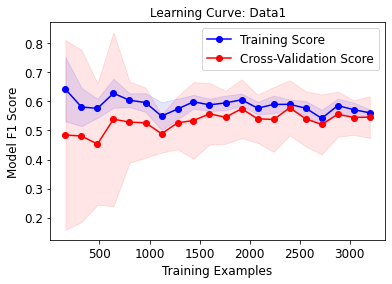

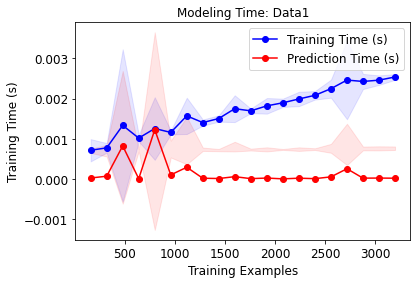

In [27]:
plot_learning_curve(best_tree, X1_train.values, y1_train.values,
                    title = 'Data1');

In [28]:
#data2
best_params2 = TreeGridSearchCV(start_leaf_n,
                               end_leaf_n,
                               1,10,
                               X2_train,
                               y2_train)

Per Hyperparameter tuning, best parameters are:
{'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 24}
0.4373868644195415


In [ ]:
best_params2

In [29]:
best_tree2 = DecisionTreeClassifier(max_depth=best_params2['max_depth'],
                                   min_samples_split=best_params2['min_samples_leaf'],
                                   class_weight=best_params2['class_weight'])

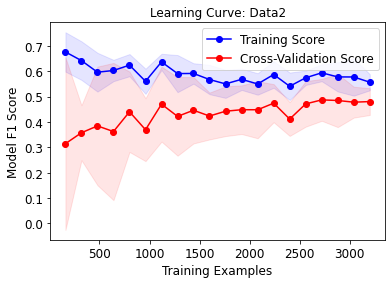

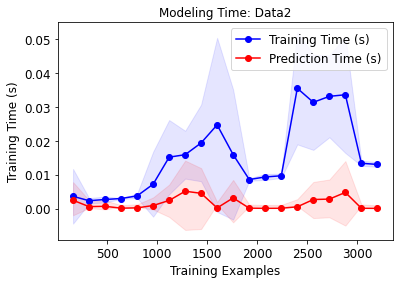

In [32]:
plot_learning_curve(best_tree2, X2_train.values, y2_train.values,
                    title = 'Data2');

#### Model performance on the testing set

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.00896
Model Prediction Time (s): 0.00894

F1 Score:  0.49
Accuracy:  0.74     AUC:       0.68
Precision: 0.42     Recall:    0.58
*****************************************************


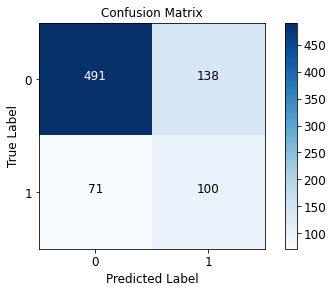

In [34]:
final_classifier_evaluation(best_tree,
                            X1_train,
                            X1_test,
                            y1_train,
                            y1_test)



Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.03816
Model Prediction Time (s): 0.00936

F1 Score:  0.42
Accuracy:  0.67     AUC:       0.62
Precision: 0.36     Recall:    0.53
*****************************************************


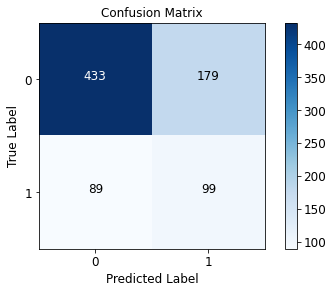

In [36]:
final_classifier_evaluation(best_tree2,
                            X2_train,
                            X2_test,
                            y2_train,
                            y2_test)

In [37]:
#save data for later use
X1_train.to_csv('X1_train.csv',index = False)
y1_train.to_csv('y1_train.csv', index = False)

In [38]:
X2_train.to_csv('X2_train.csv', index = False)
y2_train.to_csv('y2_train.csv', index = False)

In [40]:
X1_test.to_csv('X1_test.csv', index = False)
y1_test.to_csv('y1_test.csv', index = False)
X2_test.to_csv('X2_test.csv', index = False)
y2_test.to_csv('y2_test.csv', index = False)

X_v.to_csv('X_v.csv', index = False)
y_v.to_csv('y_v.csv', index = False)

In [64]:
# plot trees
from sklearn.tree import plot_tree

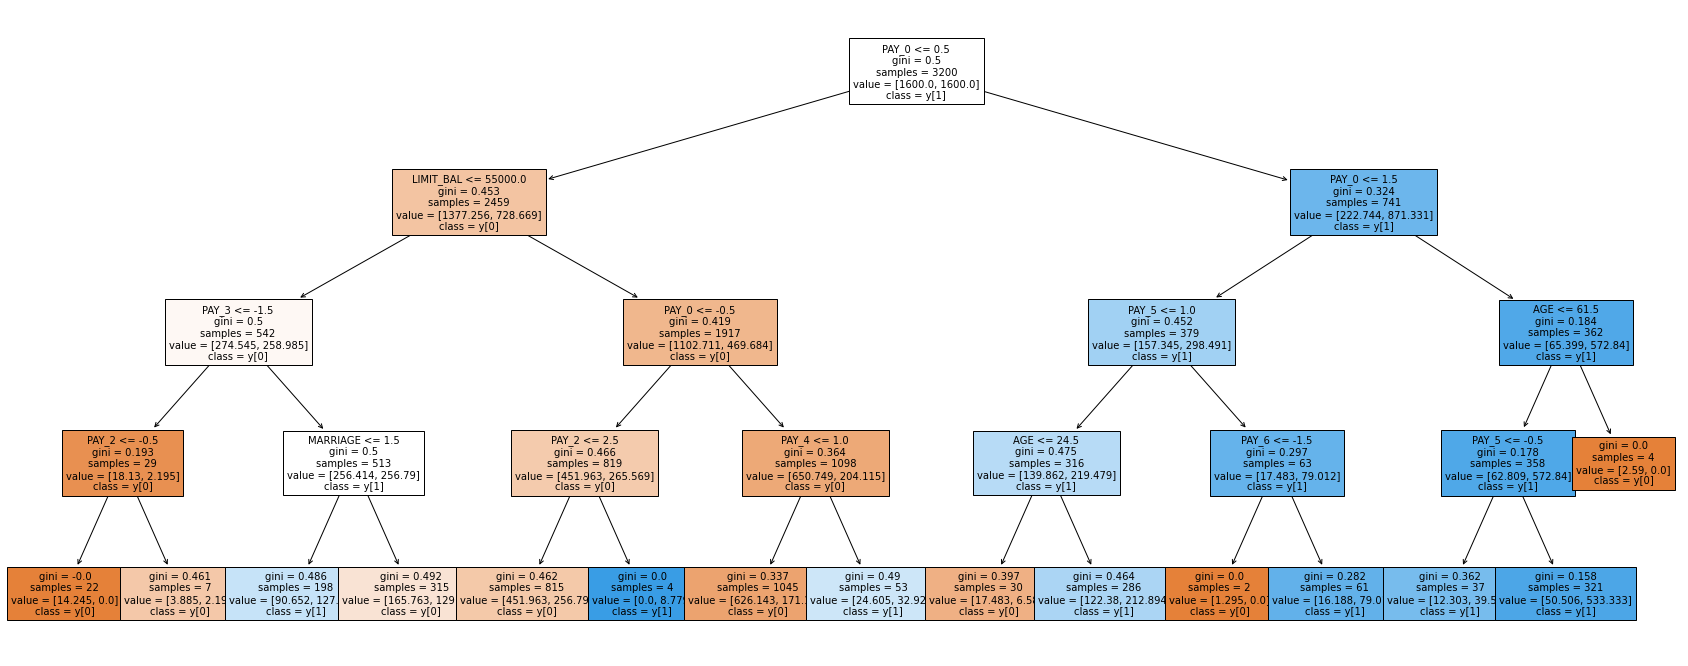

In [80]:
plt.figure(figsize=(30,12))
plot_tree(best_tree,fontsize=10,feature_names=X1_train.columns,filled=True,class_names=True);
plt.savefig('d1tree_plot.png')
plt.show()

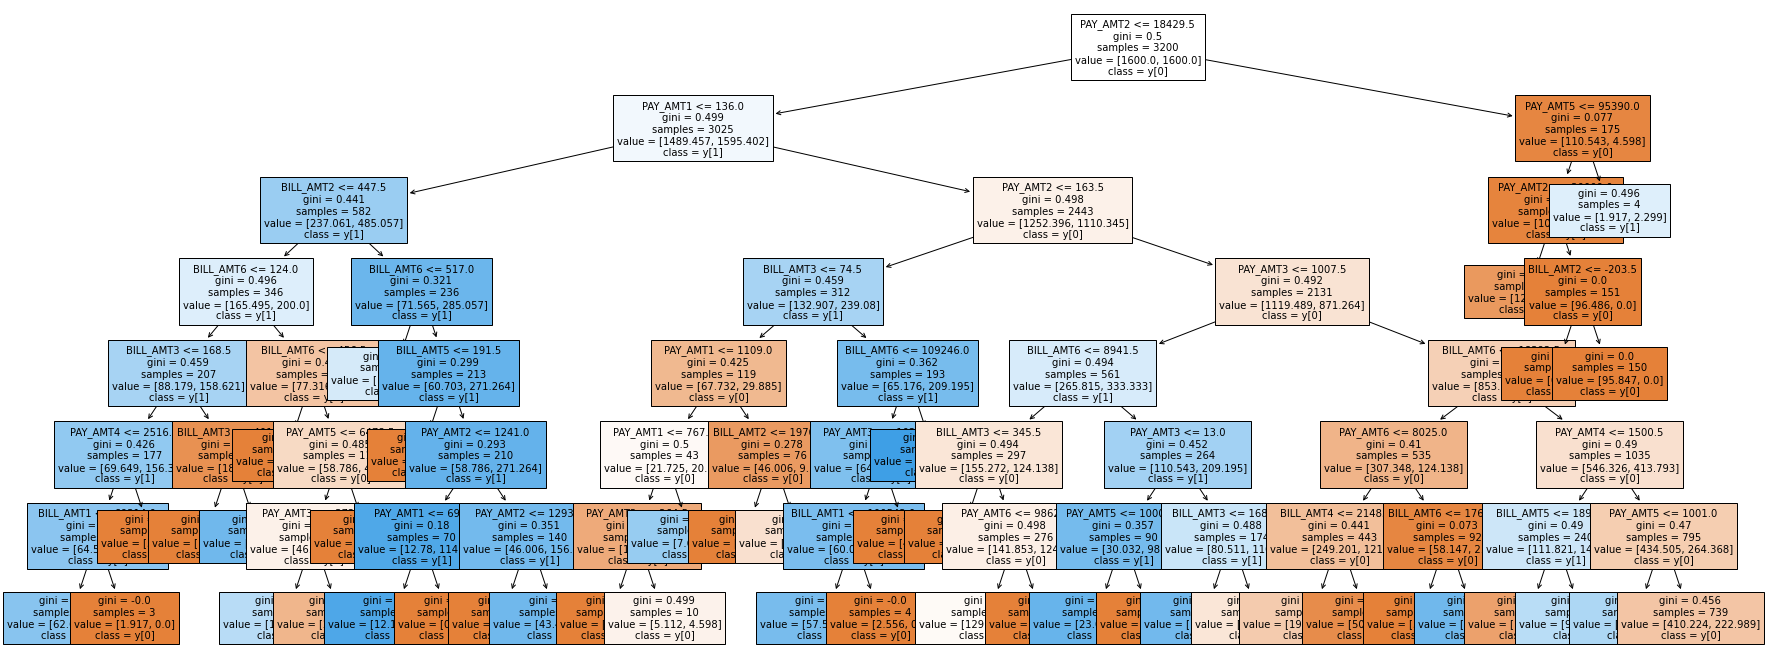

In [83]:
plt.figure(figsize=(30,12))
plot_tree(best_tree2,fontsize=10,feature_names=X2_train.columns,filled=True,class_names=True);
plt.savefig('d2tree_plot.png')
plt.show()

### Algorithm 2: Gradient Boosting

In [96]:
init_GB = GradientBoostingClassifier()
init_GB.fit(X1_train, y1_train)
y1_pred = init_GB.predict(X1_train)
print("F1 Score:")
print(f1_score(y1_train, y1_pred))
init_GB.get_params()

F1 Score:
0.5611888111888111


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [105]:
init_GB2 = GradientBoostingClassifier()
init_GB2.fit(X2_train, y2_train)
y2_pred = init_GB2.predict(X2_train)
print("F1 Score:")
print(f1_score(y2_train, y2_pred))
init_GB2.get_params()

F1 Score:
0.3729552889858233


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [150]:
def hyperBoost(X_train, y_train, X_test, y_test, max_depth_list, min_samples_leaf,
               n_estimators = np.linspace(10,200,20).astype('int')):

    f1_test = np.zeros(( len(n_estimators),len(max_depth_list)))
    f1_train = np.zeros(( len(n_estimators),len(max_depth_list)))
    f1_cv = np.zeros(( len(n_estimators),len(max_depth_list)))

    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    for i in range(len(n_estimators)):
        for j in range(len(max_depth_list)):
                clf = GradientBoostingClassifier(n_estimators=n_estimators[i],
                                                 max_depth=max_depth_list[j],
                                                 min_samples_leaf=int(min_samples_leaf/2),
                                                 random_state=1,)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                cv_results = cross_val_score(estimator=clf,
                                              X=X_train,
                                              y=y_train,
                                              cv=kfold,
                                              scoring='f1')

                f1_test[i,j] = f1_score(y_test, y_pred_test)
                f1_train[i,j] = f1_score(y_train, y_pred_train)
                f1_cv[i,j] = cv_results.mean()

    return f1_train, f1_test, f1_cv

In [151]:
#data2
n_estimators = [20,40,80,100,150,200, 300, 500]
d1_f1_train, d1_f1_test, d1_f1_cv = hyperBoost(X1_train, y1_train, X1_test, y1_test, [3,4,5], 40, n_estimators = n_estimators)

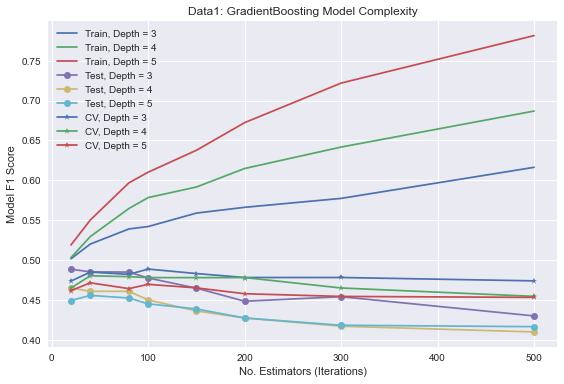

In [166]:
plt.plot(n_estimators, d1_f1_train, '-',)
plt.plot(n_estimators, d1_f1_test, 'o-', )
plt.plot(n_estimators, d1_f1_cv,'*-')
plt.legend(labels = ['Train, Depth = 3',
                     'Train, Depth = 4',
                     'Train, Depth = 5',
                     'Test, Depth = 3',
                     'Test, Depth = 4',
                     'Test, Depth = 5',
                     'CV, Depth = 3',
                     'CV, Depth = 4',
                     'CV, Depth = 5'], loc = 'upper left',
          )

plt.ylabel('Model F1 Score')
plt.xlabel('No. Estimators (Iterations)')

plt.title('Data1: GradientBoosting Model Complexity')
plt.tight_layout()
plt.savefig('d1_GB_cmplxty.png')
plt.show()

In [159]:
#data2
d2_f1_train, d2_f1_test, d2_f1_cv = hyperBoost(X2_train, y2_train, X2_test, y2_test, [3,4,5], 40, n_estimators = n_estimators)

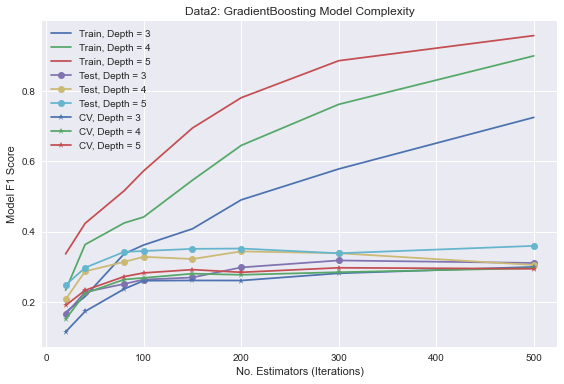

In [165]:
plt.plot(n_estimators, d2_f1_train, '-',)
plt.plot(n_estimators, d2_f1_test, 'o-', )
plt.plot(n_estimators, d2_f1_cv,'*-')
plt.legend(labels = ['Train, Depth = 3',
                     'Train, Depth = 4',
                     'Train, Depth = 5',
                     'Test, Depth = 3',
                     'Test, Depth = 4',
                     'Test, Depth = 5',
                     'CV, Depth = 3',
                     'CV, Depth = 4',
                     'CV, Depth = 5'], loc = 'upper left',
)

plt.ylabel('Model F1 Score')
plt.xlabel('No. Estimators (Iterations)')

plt.title('Data2: GradientBoosting Model Complexity')
plt.tight_layout()
plt.savefig('d2_GB_cmplxty.png')
plt.show()

In [258]:
#use random search to search for the best params giving a higher learning rate - 0.2
def BoostedGridSearchCV( X_train,
                        y_train,
                        min_samples_leaf = np.linspace(20,200,10).round().astype('int'),
                        n_estimators = np.linspace(40,400,10).round().astype('int'),
                        max_depth_list = np.arange(3,6),
                        max_features = np.linspace(0.2, 1,5)
                       ):
    #parameters to search:
    #n_estimators, learning_rate, max_depth, min_samples_leaf,max_features,
    param_distribution = {
                  'min_samples_leaf': min_samples_leaf,
                  'max_depth': max_depth_list,
                  'n_estimators': n_estimators,
                  'max_features': max_features,
                  'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.1, 0.2]
                }

    boost = RandomizedSearchCV(estimator = GradientBoostingClassifier(),param_distributions=param_distribution,
                               cv=10, n_jobs=-1,
                               scoring='f1')
    boost.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(boost.best_params_)
    print("Best F1 Score")
    print(boost.best_score_)
    return boost.best_params_, boost.get_params()

In [259]:
d1_best_GB= BoostedGridSearchCV(X1_train, y1_train)

Per Hyperparameter tuning, best parameters are:
{'n_estimators': 400, 'min_samples_leaf': 160, 'max_features': 0.8, 'max_depth': 4, 'learning_rate': 0.02}
Best F1 Score
0.5026229161904812


In [262]:
d1_best_GB[0]

{'n_estimators': 400,
 'min_samples_leaf': 160,
 'max_features': 0.8,
 'max_depth': 4,
 'learning_rate': 0.02}

In [264]:
d2_best_GB = BoostedGridSearchCV(X2_train, y2_train,max_depth_list=np.arange(2,7))

Per Hyperparameter tuning, best parameters are:
{'n_estimators': 320, 'min_samples_leaf': 60, 'max_features': 1.0, 'max_depth': 3, 'learning_rate': 0.1}
Best F1 Score
0.2824598186403919


In [267]:
d2_best_GB[0]

{'n_estimators': 320,
 'min_samples_leaf': 60,
 'max_features': 1.0,
 'max_depth': 3,
 'learning_rate': 0.1}

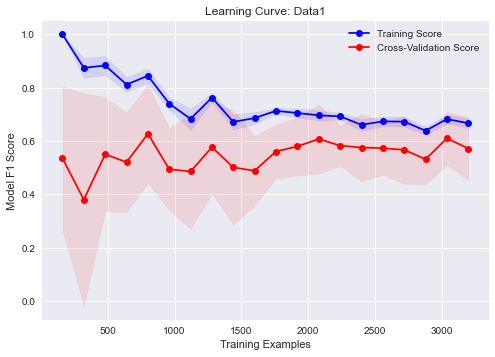

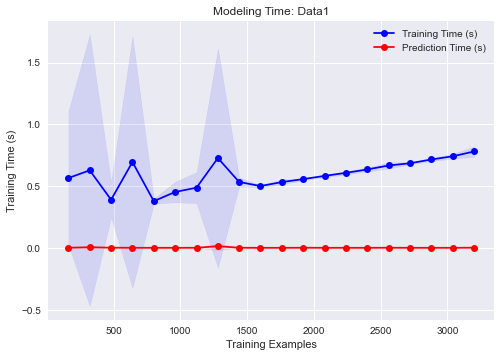

In [270]:
#plot learning rate
#data1
best_GB = GradientBoostingClassifier(max_depth=d1_best_GB[0]['max_depth'],
                                 n_estimators = d1_best_GB[0]['n_estimators'],
                                 max_features=d1_best_GB[0]['max_features'],
                                learning_rate=d1_best_GB[0]['learning_rate']

                                 )

plot_learning_curve(best_GB, X1_train.values, y1_train.values,title='Data1');

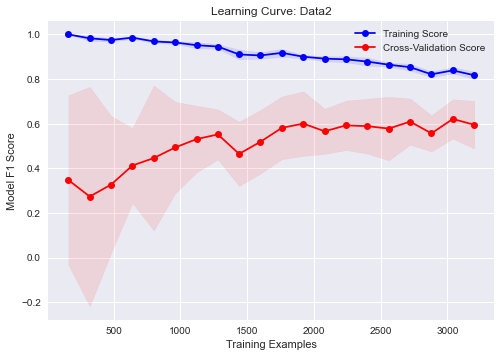

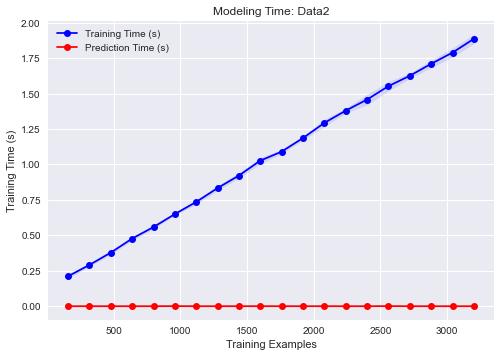

In [271]:
#data2
best_GB2 = GradientBoostingClassifier(max_depth=d2_best_GB[0]['max_depth'],
                                 n_estimators = d2_best_GB[0]['n_estimators'],
                                 max_features=d2_best_GB[0]['max_features'],
                                learning_rate=d2_best_GB[0]['learning_rate']

                                 )

plot_learning_curve(best_GB2, X2_train.values, y2_train.values, title = 'Data2');

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   2.32017
Model Prediction Time (s): 0.04364

F1 Score:  0.45
Accuracy:  0.82     AUC:       0.64
Precision: 0.63     Recall:    0.35
*****************************************************


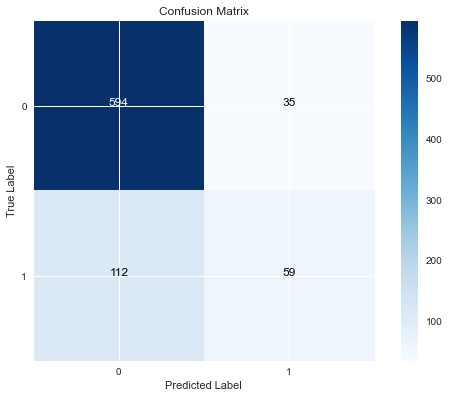

In [272]:
#final model performance on test
#data1
final_classifier_evaluation(best_GB, X1_train, X1_test, y1_train, y1_test)

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   4.34040
Model Prediction Time (s): 0.00451

F1 Score:  0.35
Accuracy:  0.78     AUC:       0.60
Precision: 0.59     Recall:    0.25
*****************************************************


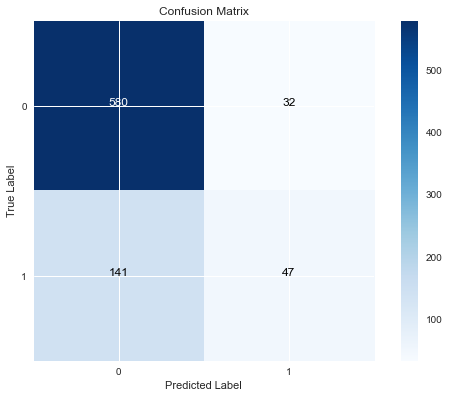

In [273]:
final_classifier_evaluation(best_GB2,X2_train, X2_test, y2_train, y2_test )

### Algorithm 3: ANN

In [276]:
#Normalize the data before building the ANN model
scaler1 = preprocessing.StandardScaler().fit(X1_train)
scale_x1_train = scaler1.transform(X1_train)
scale_x1_test = scaler1.transform(X1_test)

In [277]:
scaler2 = preprocessing.StandardScaler().fit(X2_train)
scale_x2_train = scaler2.transform(X2_train)
scale_x2_test = scaler2.transform(X2_test)

In [306]:
#initial ANN
init_ann1 = MLPClassifier()
init_ann1.fit(scale_x1_train, y1_train)
y1_ann_pred = init_ann1.predict(scale_x1_test)
f1_score(y1_test, y1_ann_pred)

/Users/siyuanliu/Gatech/ML/hw1/Project/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.463768115942029

In [307]:
init_ann2 = MLPClassifier()
init_ann2.fit(scale_x2_train, y2_train)
y2_ann_pred = init_ann2.predict(scale_x2_test)
f1_score(y2_test, y2_ann_pred)

/Users/siyuanliu/Gatech/ML/hw1/Project/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.08866995073891626

In [351]:
#demonstrate how the model performance with different hidden layers and different activation functions
def hyperNN(X_train, y_train, X_test, y_test, title,
            hlist = np.linspace(1,15,15).astype('int'),
            activation = ["logistic","relu"]):

    f1_test = np.zeros(( len(hlist),len(activation)))
    f1_train = np.zeros(( len(hlist),len(activation)))
    f1_cv = np.zeros((len(hlist),len(activation)))

    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)

    for i in range(len(hlist)):
        for j in range(len(activation)):
                clf = MLPClassifier(hidden_layer_sizes=hlist[i], solver='adam', activation=activation[j],
                                    learning_rate_init=0.05, random_state=1, max_iter=500)
                clf.fit(X_train, y_train)

                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                cv_results = cross_val_score(estimator=clf,
                                              X=X_train,
                                              y=y_train,
                                              cv=kfold,
                                              scoring='f1')
                f1_test[i,j] = (f1_score(y_test, y_pred_test))
                f1_train[i,j] = (f1_score(y_train, y_pred_train))
                f1_cv[i,j] = cv_results.mean()
    return f1_test, f1_train, f1_cv

In [352]:
hlist = [(10,) * i for i in range(1,11)]
hlist

[(10,),
 (10, 10),
 (10, 10, 10),
 (10, 10, 10, 10),
 (10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10, 10, 10, 10),
 (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)]

In [353]:
#data1
d1_ann_test,d1_ann_train, d1_ann_cv = \
    hyperNN(scale_x1_train, y1_train,scale_x1_test, y1_test,'Data1', hlist= hlist)

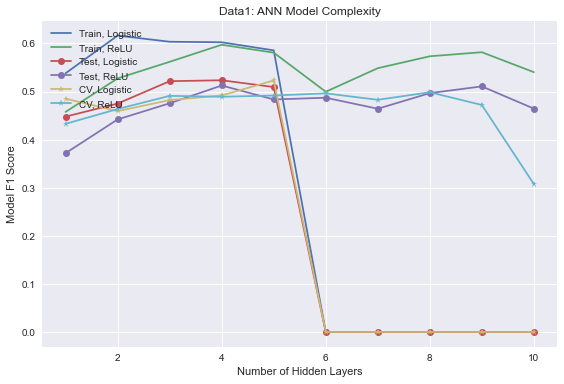

In [354]:
plt.plot(range(1,11), d1_ann_train, '-',)
plt.plot(range(1,11), d1_ann_test, 'o-', )
plt.plot(range(1,11), d1_ann_cv,'*-')
plt.legend(labels = ['Train, Logistic',
                     'Train, ReLU',
                     'Test, Logistic',
                     'Test, ReLU',
                     'CV, Logistic',
                     'CV, ReLU'], loc = 'upper left',
          )

plt.ylabel('Model F1 Score')
plt.xlabel('Number of Hidden Layers')

plt.title('Data1: ANN Model Complexity')
plt.tight_layout()
plt.savefig('d1_ANN_cmplxty.png')
plt.show()

In [355]:
#data2
d2_ann_test,d2_ann_train, d2_ann_cv = \
    hyperNN(scale_x2_train, y2_train,scale_x2_test, y2_test,'Data2',hlist=hlist);

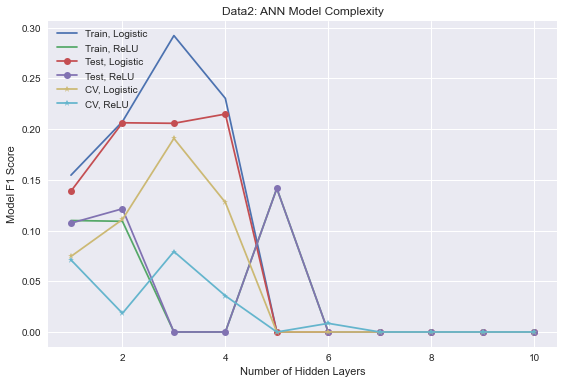

In [357]:
plt.plot(range(1,11), d2_ann_train, '-',)
plt.plot(range(1,11), d2_ann_test, 'o-', )
plt.plot(range(1,11), d2_ann_cv,'*-')
plt.legend(labels = ['Train, Logistic',
                     'Train, ReLU',
                     'Test, Logistic',
                     'Test, ReLU',
                     'CV, Logistic',
                     'CV, ReLU'], loc = 'upper left',
          )

plt.ylabel('Model F1 Score')
plt.xlabel('Number of Hidden Layers')

plt.title('Data2: ANN Model Complexity')
plt.tight_layout()
plt.savefig('d2_ANN_cmplxty.png')
plt.show()


In [358]:
def NNGridSearchCV(X_train, y_train,hidden, alpha):
    #parameters to search:
    #number of hidden units
    #learning_rate

    param_grid = {'hidden_layer_sizes': hidden,
                  'learning_rate_init': alpha,
                  'activation':['logistic','relu','tanh']}

    net = GridSearchCV(estimator = MLPClassifier(solver='adam',random_state=1),
                       param_grid=param_grid, cv=10, scoring='f1')
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    print('Best F1 Score')
    print(net.best_score_)
    return net.best_params_

In [359]:
d = scale_x1_train.shape[1]
d

11

In [360]:
hiddens = [(h,)*l for l in [1,2,3,4] for h in [d,d//2,d*2 ]]
alphas = [10**-x for x in np.arange(-2,2.0,1)]
d1_best_ann = NNGridSearchCV(scale_x1_train, y1_train, hidden = hiddens, alpha = alphas)

Per Hyperparameter tuning, best parameters are:
{'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5, 5), 'learning_rate_init': 0.1}
Best F1 Score
0.5278087631604729


In [362]:
best_ann = MLPClassifier(
    activation = d1_best_ann['activation'],
    hidden_layer_sizes = d1_best_ann['hidden_layer_sizes'],
    learning_rate_init = d1_best_ann['learning_rate_init']
)

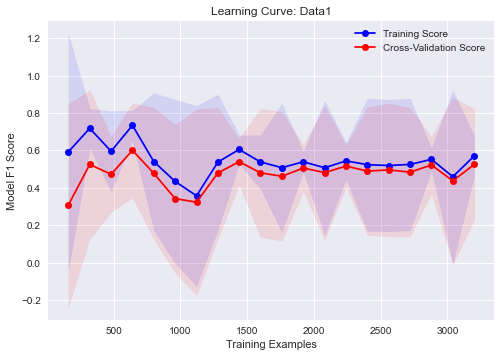

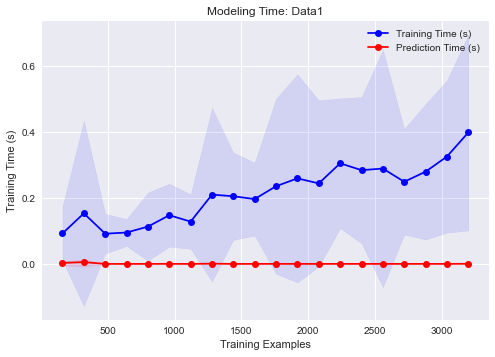

(array([ 160,  320,  480,  640,  800,  960, 1120, 1280, 1439, 1599, 1759,
        1920, 2080, 2240, 2400, 2560, 2720, 2880, 3040, 3200]),
 array([0.59280197, 0.7186017 , 0.59599562, 0.73464038, 0.54073927,
        0.43430061, 0.35760683, 0.53789111, 0.60547729, 0.5388024 ,
        0.50816208, 0.53959617, 0.50773587, 0.54425766, 0.52413594,
        0.51954077, 0.52550611, 0.5525948 , 0.45965681, 0.57076318]),
 array([0.09235983, 0.15313671, 0.09154189, 0.09508336, 0.11297662,
        0.14746606, 0.12816179, 0.20976384, 0.20500271, 0.19634991,
        0.23513064, 0.25903115, 0.24374607, 0.30468709, 0.28391013,
        0.28876164, 0.24879022, 0.27929413, 0.32510779, 0.39801886]),
 array([0.00232997, 0.00274382, 0.00090215, 0.00090349, 0.00093737,
        0.00108426, 0.00090845, 0.00128944, 0.00104148, 0.00105379,
        0.00110343, 0.00106478, 0.00106571, 0.00105705, 0.00105376,
        0.00113094, 0.00108216, 0.00104225, 0.00108261, 0.0012517 ]))

In [367]:
plot_learning_curve(best_ann, scale_x1_train,
                    y1_train.values, title='Data1')

In [368]:
#data2
hiddens2 = [(h,)*l for l in [1,2,3] for h in [d,d//2,d*2 ]]
d2_best_ann = NNGridSearchCV(scale_x2_train, y2_train, hidden = hiddens2, alpha = alphas)

Per Hyperparameter tuning, best parameters are:
{'activation': 'tanh', 'hidden_layer_sizes': (22,), 'learning_rate_init': 10.0}
Best F1 Score
0.25833823075966306


In [369]:
best_ann2 = MLPClassifier(
    activation = d2_best_ann['activation'],
    hidden_layer_sizes = d2_best_ann['hidden_layer_sizes'],
    learning_rate_init = d2_best_ann['learning_rate_init']
)

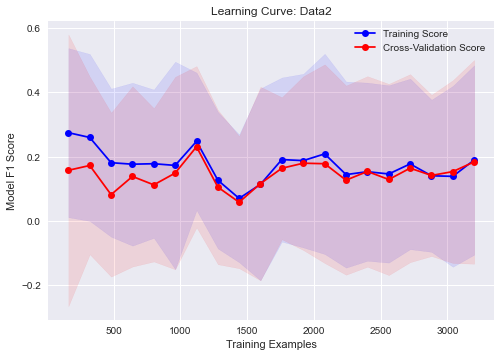

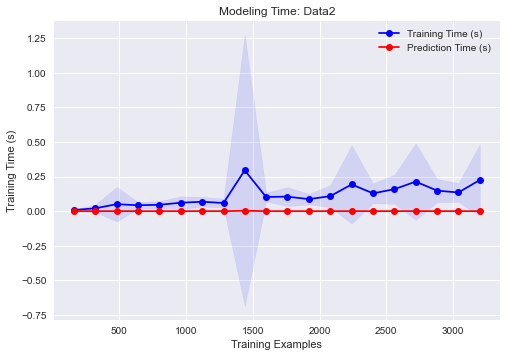

In [370]:
plot_learning_curve(best_ann2, scale_x2_train,
                    y2_train.values, title='Data2');

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.31201
Model Prediction Time (s): 0.00034

F1 Score:  0.50
Accuracy:  0.80     AUC:       0.68
Precision: 0.55     Recall:    0.46
*****************************************************


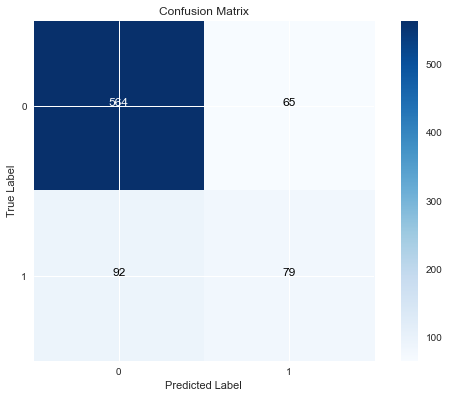

In [372]:
#data1
final_classifier_evaluation(best_ann,
                            scale_x1_train,
                            scale_x1_test,
                            y1_train.values,
                            y1_test.values);

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.18697
Model Prediction Time (s): 0.00049

F1 Score:  0.05
Accuracy:  0.76     AUC:       0.50
Precision: 0.31     Recall:    0.03
*****************************************************


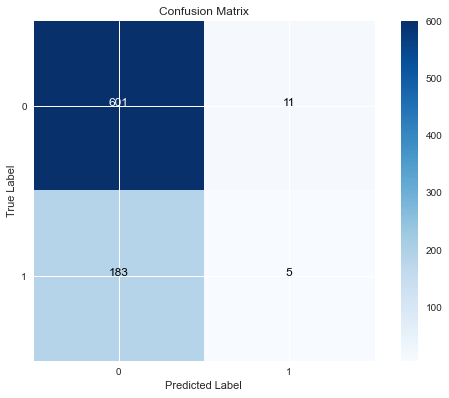

In [373]:
final_classifier_evaluation(best_ann2,
                            scale_x2_train,
                            scale_x2_test,
                            y2_train.values,
                            y2_test.values);


Best models' performance on the validation set

In [374]:
import pickle


In [375]:
models = [best_tree, best_tree2,
          best_GB, best_GB2,
          best_ann, best_ann2]
files = ['tree1.p','tree2.p',
         'GB1.p', 'GB2.p',
         'ANN1.p','ANN2.p']

for i in range(6):
    pickle.dump(models[i], open(files[i], 'wb'))
